# **S6.Missing data. Correlation**

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We will use the date on the passengers of the Titanic

**Variables**:

**PassengerId** - passenger id

**Survived** - survived passenger (1) or not (0)

**Pclass** - passenger class

**Name** - passenger's name

**Sex** - the gender of the passenger

**Age** - passenger's age

**SibSp** - the number of relatives (brothers, sisters, spouses) of the passenger on board

**Parch** - number of relatives (parents / children) of the passenger on board

**Ticket** - ticket number

**Fare** - fare (ticket price)

**Cabin** - cabin number

**Embarked** - port where the passenger boarded (C - Cherbourg, S - Southampton, Q = Queenstown)

In [60]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing data

### Detecting

In [63]:
df.isna().sum().sum()

866

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [64]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Look at NaNs

Display only rows **with NaNs** in the Age column:

In [6]:
df[df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Display only rows **without NaNs** in the Age column:

In [69]:
df[~df.Age.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Working with missing data

- If there are more than 40% NaNs in the column:
  - **delete the column**

- If less than 40% of data is missing in a column:
  - **remove** all **rows** that have NaNs (when there is a lot of data)
  - **replace** all **rows** that have NaNs (when there is not much data)

In [71]:
df.Age.value_counts(dropna=False, normalize=True)

NaN      0.198653
24.00    0.033670
22.00    0.030303
18.00    0.029181
28.00    0.028058
           ...   
36.50    0.001122
55.50    0.001122
0.92     0.001122
23.50    0.001122
74.00    0.001122
Name: Age, Length: 89, dtype: float64

In [9]:
df.Cabin.value_counts(dropna=False, normalize = True)

NaN            0.771044
C23 C25 C27    0.004489
G6             0.004489
B96 B98        0.004489
C22 C26        0.003367
                 ...   
E34            0.001122
C7             0.001122
C54            0.001122
E36            0.001122
C148           0.001122
Name: Cabin, Length: 148, dtype: float64

#### More than 40% NaNs in the column

Remove column:



``` python
dataframe.drop('column name', axis=1) #just show the dataset without this column (can be saved to a new variable)
```

``` python
dataframe.drop('column name', axis=1, inplace=True) #will actually remove the column from the original dataframe
```

In [72]:
df.drop('Cabin', axis=1, inplace=True)

Remove columns:



``` python
dataframe.drop(['column name 1', 'column name 2'], axis=1) #just show the dataset without this column (can be saved to a new variable)
```

In [11]:
df.drop(['Age', 'Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C


#### Less than 40% in the column

##### **Remove**

Remove all rows, with at least one NaN



``` python
dataframe.dropna(subset = ['column name'], axis=1) #just show the dataset without nan (can be saved to a new variable)
```

``` python
dataframe.dropna(subset = ['column name'], inplace=True) #will actually remove nan from the original dataframe
```

In [74]:
df.shape

(891, 11)

In [73]:
df.dropna().shape

(712, 11)

Remove all rows that have NaNs in a specific column

In [13]:
df.dropna(subset = ['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


##### **Replace**

You can replace the missing data with:
- a measure of the central tendency over the entire column
- a measure of the central tendency within the group
- a random element

###### Replacing with a measure of central tendency over the entire column

**Quantitative data**:
- **Continuous**
  - Symmetric distribution:
    - replace with **median**/mean
  - Asymmetric distribution:
    - replace with median
- **Discrete**
  - replace with mode / average

**Categorical data**:
  - replace with mode

1. Determine which measure of central tendency will best estimate a typical observation from our data distribution

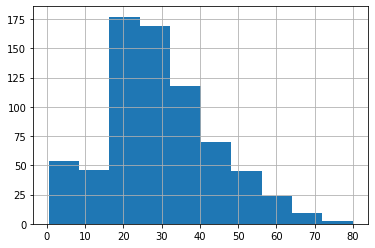

In [75]:
df.Age.hist();

2. Calculate this measure of central tendency



In [76]:
df.Age.median()

28.0

In [77]:
df.Age.mean()

29.69911764705882

3. Replace NaNs with a measure of central tendency

In [78]:
df['Age_fillna'] = df['Age'].fillna(df.Age.median())
#replace all NaNs in the Age column with the median

4. Verify that all NaNs have been replaced

In [81]:
df[df['Age'].isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_fillna
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,28.0


An example with a categorical variable:

In [86]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [87]:
df.Embarked.mode()[0]

'S'

In [84]:
df['Embarked_fillna'] = df['Embarked'].fillna(df.Embarked.mode()[0]) 
#replace all NaNs in the port column with fashion
df[df['Embarked'].isna()].head() #check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_fillna,Embarked_fillna
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0,S


###### Replacing with measure of the central tendency within the group

1. Determine which measure of central tendency will best estimate a typical observation from our data distribution

<AxesSubplot:>

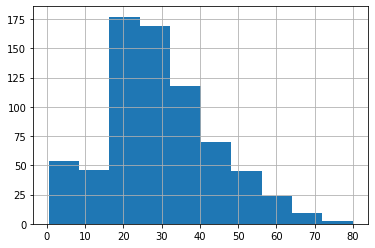

In [21]:
df.Age.hist()

2. Let's make an assumption about what factors will affect the value of the variable (in which we replace the NaNs). In our case, the median Age of a passenger increases as cabin class improves.

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna,Embarked_fillna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S


In [23]:
df.groupby('Pclass').Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

3. Using the `.transform()` method, we substitute the median age for each passenger depending on the class

In [24]:
df.groupby('Pclass').Age.transform('median')

0      24.0
1      37.0
2      24.0
3      37.0
4      24.0
       ... 
886    29.0
887    37.0
888    24.0
889    37.0
890    24.0
Name: Age, Length: 891, dtype: float64

4. Replace age with median age within one class (Pclass) only for missing values using the `.fillna()`

In [88]:
df['Age_fillna_mg'] = \
df['Age'].fillna(df.groupby('Pclass').Age.transform('median'))

5. Let's check the replacement

In [89]:
df[df.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_fillna,Embarked_fillna,Age_fillna_mg
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q,28.0,Q,24.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S,28.0,S,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C,28.0,C,24.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C,28.0,C,24.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q,28.0,Q,24.0


###### Replacing with a random element

1. Create an array that contains the random elements of the column (where you want to replace gaps)



``` python
np.random_choice(dataframe['column name'].dropna(), df.shape[0])
```



In [27]:
df.shape[0]

891

In [90]:
np.random.choice(df.Age.dropna(), df.shape[0])[:5]

array([28., 18., 24.,  2., 29.])

2. Convert array to Series format

In [91]:
pd.Series(np.random.choice(df.Age.dropna(), df.shape[0]))[:5]

0     0.42
1    25.00
2    17.00
3    29.00
4    24.00
dtype: float64

3. Replace NaNs with a random element from this Series object

In [92]:
df['Age_random'] = \
df.Age.fillna(pd.Series(np.random.choice(df.Age.dropna(), df.shape[0])))

4. Let's check the replacement

In [31]:
df[df.Age.isna()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fillna,Embarked_fillna,Age_fillna_mg,Age_random
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,Q,24.0,43.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0,S,29.0,18.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0,C,24.0,23.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0,C,24.0,26.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0,Q,24.0,39.0


## Correlation

### Correlation and its properties

**Correlation coefficients** are indicators of the strength of the linear relationship between two different variables, x and y

1. Changes from -1 to 1
2. A positive correlation coefficient indicates a direct relationship
3. A negative correlation coefficient indicates an inverse relationship


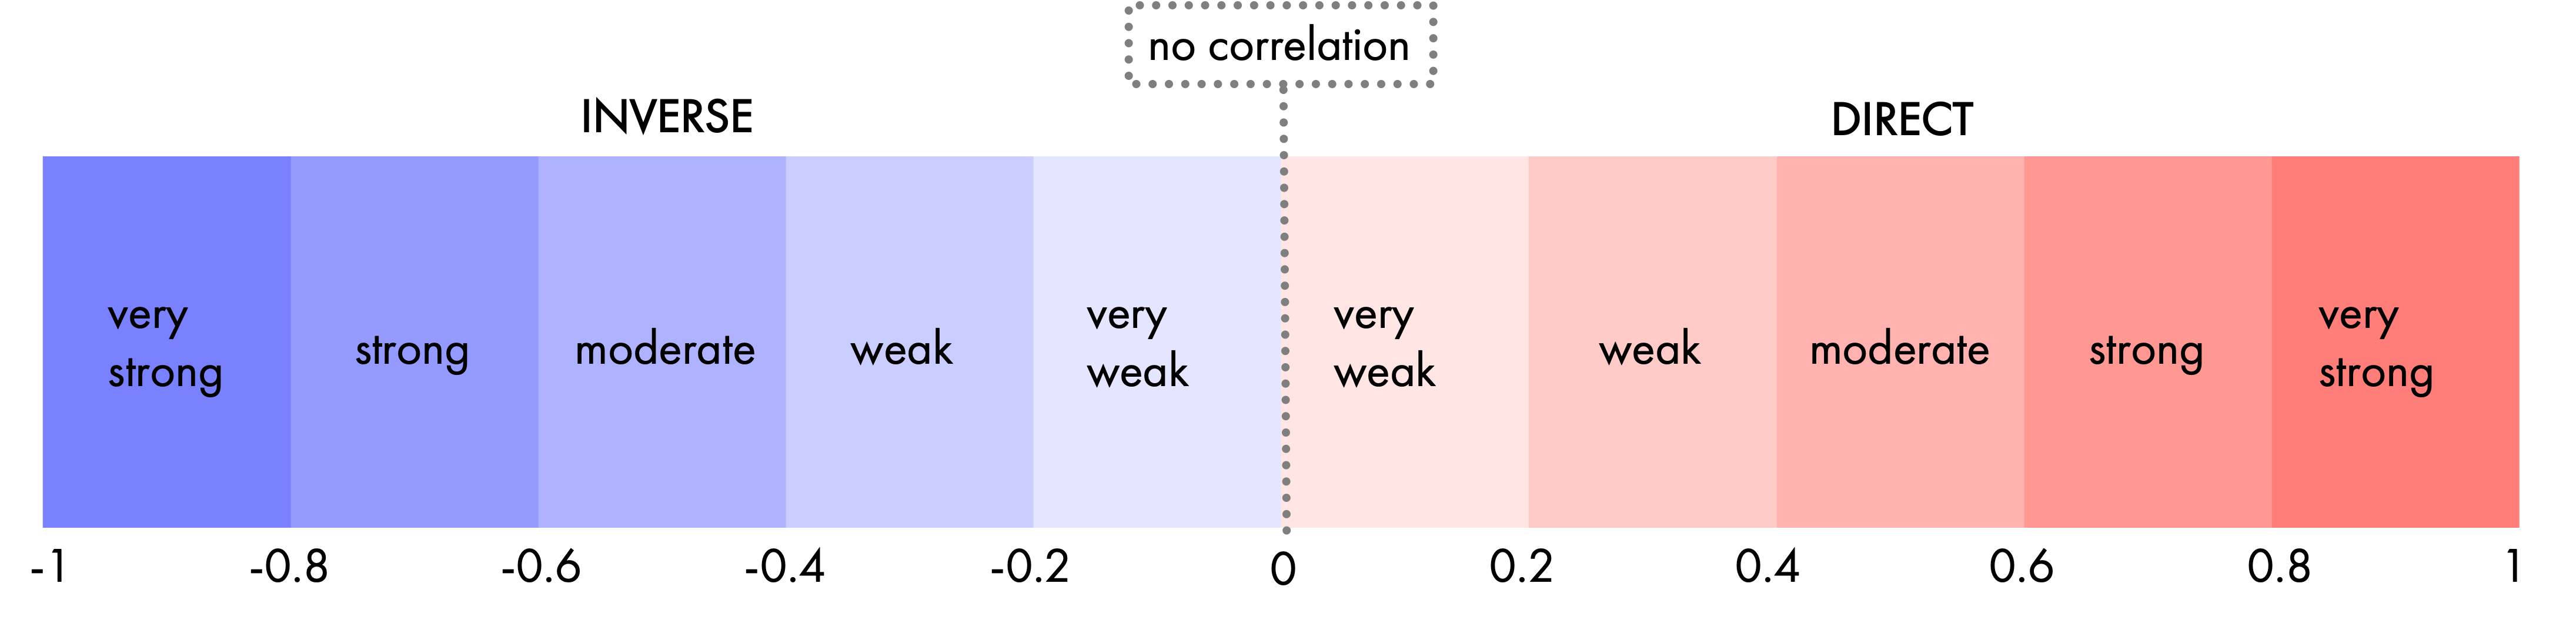

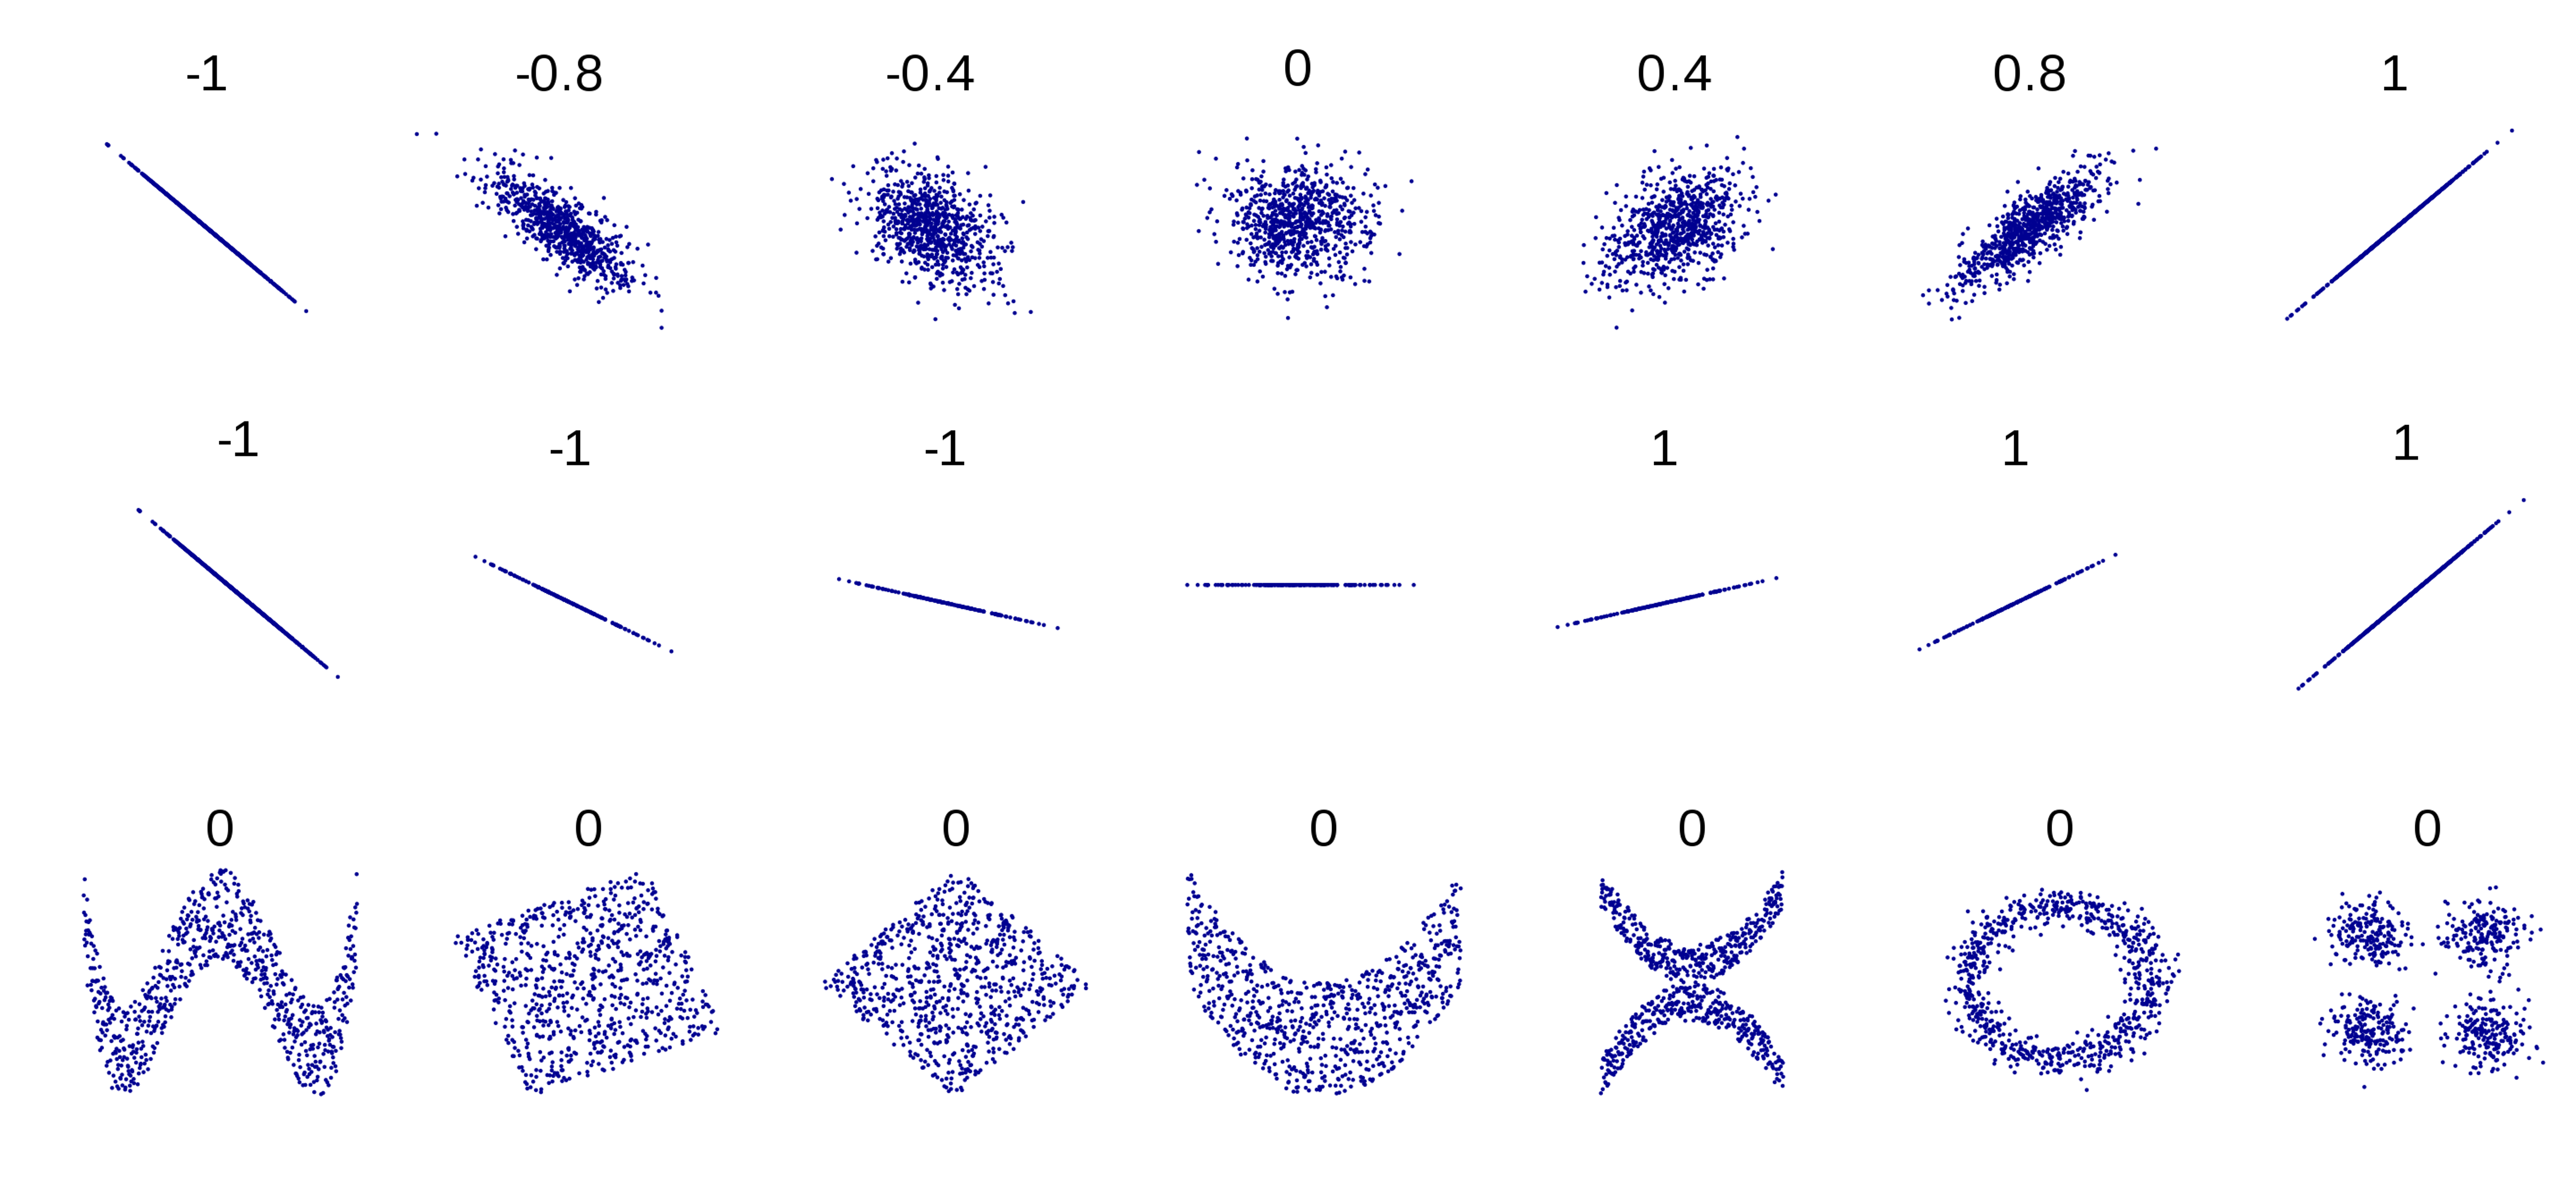

### Сalculation of the correlation coefficient

Pearson's correlation coefficient:

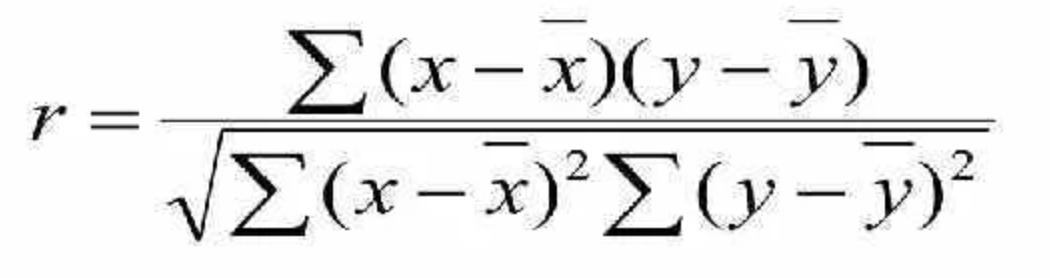

In [109]:
x_x = marks['Python'] - marks['Python'].mean()# x - x.avg
x_x

0    2.8
1   -3.2
2   -0.2
3   -1.2
4    1.8
Name: Python, dtype: float64

In [110]:
y_y = marks['GPA'] - marks['GPA'].mean() # y - y.avg
y_y

0    1.22
1   -0.08
2    0.02
3   -0.88
4   -0.28
Name: GPA, dtype: float64

In [112]:
x_x * y_y # (x - x.avg) * (y - y.avg)

0    3.416
1    0.256
2   -0.004
3    1.056
4   -0.504
dtype: float64

In [114]:
np.sum(x_x * y_y) # sum of (x - x.avg) * (y - y.avg)

4.22

In [119]:
x_s = np.sum(x_x ** 2) # sum of (x - x.avg) ** 2
x_s

22.8

In [118]:
y_s = np.sum(y_y ** 2) # sum of (y - y.avg) ** 2
y_s

2.3479999999999994

In [121]:
np.sqrt(x_s * y_s)

7.316720576870487

In [122]:
np.sum(x_x * y_y) / np.sqrt(x_s * y_s)

0.5767611261991067

In [103]:
((marks['Python'] - marks['Python'].mean()) * \
(marks['GPA'] - marks['GPA'].mean())).sum()

4.22

In [106]:
(((marks['Python'] - marks['Python'].mean()) ** 2).sum() * \
((marks['GPA'] - marks['GPA'].mean()) ** 2).sum()) ** 0.5

7.316720576870487

#### On one's own

Student grades for a Python course, as well as the average score of these students:

In [129]:
marks = pd.DataFrame()
marks['Student'] =  ['Anna', 'Ivan', 'Peter', 'Zoya', 'Yan']
marks['Python'] = [9, 3, 6, 5, 8]
marks['GPA'] = [8.5, 7.2, 7.3, 6.4, 7.0]
marks

,Student,Python,GPA
0,Anna,9,8.5
1,Ivan,3,7.2
2,Peter,6,7.3
3,Zoya,5,6.4
4,Yan,8,7.0


In [130]:
marks.corr()

,Python,GPA
Python,1.000000,0.576761
GPA,0.576761,1.000000


**We want to determine the degree of linear relationship between GPA and Python grade**

Let's do this using Pearson's correlation coefficient:

1. Calculate the average student grade in the Python course:

> (9+3+6+5+8)/5=**6.2**



In [33]:
marks['Python'].mean()

6.2

2. We consider the deviations and the square of the deviation of each estimate from the mean

Student| Python |Python-Python_avg|(Python-Python_avg)^2
-------| ---------------- |-------------------------------|------------
Аня    | 9                |9-*6.2* = **2.8**                 |(9-*6.2*)^2 = **7.84**
Ваня   | 3                |3-*6.2* = **-3.2**                   |(3-*6.2*)^2 = **10.24**
Дима   | 6                |6-*6.2* = **-0.2**                  |(6-*6.2*)^2 = **0.04**
Зоя    | 5                |5-*6.2* = **-1.2**                   |(5-*6.2*)^2 = **1.44** 
Ян     | 8                |8-*6.2* = **1.8**                    |(8-6.2)^2 = **3.24**

In [94]:
marks['Python-Python_avg'] = marks['Python'] - marks['Python'].mean()
marks['(Python-Python_avg)^2'] = marks['Python-Python_avg'] ** 2
marks.drop('GPA', axis=1)

,Student,Python,Python-Python_avg,(Python-Python_avg)^2
0,Anna,9,2.8,7.84
1,Ivan,3,-3.2,10.24
2,Peter,6,-0.2,0.04
3,Zoya,5,-1.2,1.44
4,Yan,8,1.8,3.24


3. Сalculate the average GPA of students:

> (8.5+7.2+7.3+6.4+7.0)/5=**7.3**



In [95]:
marks['GPA'].mean()

7.279999999999999

4. Найдем отклонение и квадрат отклонения каждого GPA от среднего

Студент | GPA  | GPA-СР.GPA           | (GPA-СР.GPA)^2 
------- | -----|----------------------|----------------
Аня     | 8.5  | 8.5-*7.3* = **1.22** |(8.5-*7.3*)^2 = **1.49**
Ваня    | 7.2  | 7.2-*7.3* = **-0.08**|(7.2-*7.3*)^2 = **0.01**
Дима    | 7.3  | 7.3-*7.3* = **0.02** |(7.3-*7.3*)^2 = **0.0**
Зоя     | 6.4  | 6.4-*7.3* = **-0.88**|(6.4-*7.3*)^2 = **0.77**
Ян      | 7.0  | 7.0-*7.3* = **-0.28**|(7.0-*7.3*)^2 = **0.08**

In [96]:
marks['GPA-GPA_avg'] =  marks['GPA'] - marks['GPA'].mean()
marks['(GPA-GPA_avg)^2'] =  marks['GPA-GPA_avg'] **2
marks.drop(['Python','Python-Python_avg','(Python-Python_avg)^2'], axis =1)

,Student,GPA,GPA-GPA_avg,(GPA-GPA_avg)^2
0,Anna,8.5,1.22,1.4884
1,Ivan,7.2,-0.08,0.0064
2,Peter,7.3,0.02,0.0004
3,Zoya,6.4,-0.88,0.7744
4,Yan,7.0,-0.28,0.0784


5. Multiply columns with student Python variances and GPA grade variances

Студент|Python-Python_avg|GPA-GPA_avg	  | (Python-Python_avg)*(GPA-GPA_avg)
-------|-------------------------------|------------|------------
Аня    | 2.8                           |1.22         | 2.8 * 1.2= **3.42**
Ваня   | -3.2                          |-0.08        | -3.2 * (-0.1) = **0.26**
Дима   | -0.2                          |0.02           | -0.2 * 0 = **-0.004**
Зоя    | -1.2                          |-0.88         | -1.2 * (-0.9) = **1.06**
Ян     | 1.8                           |-0.28        | 1.8 * (-0.3) = **-0.504**

In [37]:
marks['(Python-Python_avg)*(GPA-GPA_avg)'] = marks['Python-Python_avg']* marks['GPA-GPA_avg']
marks.drop(['Student','Python','GPA','(GPA-GPA_avg)^2','(Python-Python_avg)^2'], axis =1)

,Python-Python_avg,GPA-GPA_avg,(Python-Python_avg)*(GPA-GPA_avg)
0,2.8,1.22,3.416
1,-3.2,-0.08,0.256
2,-0.2,0.02,-0.004
3,-1.2,-0.88,1.056
4,1.8,-0.28,-0.504


6. Add the resulting product of deviations from the mean



> 3.42+0.26+(-0.004)+1.06+(-0.504) = **4.22**



In [38]:
marks['(Python-Python_avg)*(GPA-GPA_avg)'].sum()

4.22

7. Находим сумму квадратов отклонений для GPA и Python

Student|(Python-Python_avg)^2|(GPA-GPA_avg)^2
-------|-------------------------------|------------
Аня    | 7.8                           |1.49         
Ваня   | 10.24                         |0.01        
Дима   | 0.04                          |0.0          
Зоя    | 1.44                          |0.77         
Ян     | 3.24                          |0.08        

In [39]:
marks[['Student','(Python-Python_avg)^2', '(GPA-GPA_avg)^2']]

,Student,(Python-Python_avg)^2,(GPA-GPA_avg)^2
0,Anna,7.84,1.4884
1,Ivan,10.24,0.0064
2,Peter,0.04,0.0004
3,Zoya,1.44,0.7744
4,Yan,3.24,0.0784



> 7.84+10.24+0.04+1.44+3.24 = **22.8**

In [40]:
marks['(Python-Python_avg)^2'].sum()

22.8



> 1.49+0.01+0.0+0.77+0.08 = **2.3**



In [41]:
marks['(GPA-GPA_avg)^2'].sum()

2.3479999999999994

8. Multiply the resulting sums



> 22.8 * 2.3 = **53.5**



In [42]:
marks['(Python-Python_avg)^2'].sum()*marks['(GPA-GPA_avg)^2'].sum()

53.53439999999999

9. We calculate the Pearson correlation coefficient



> 4.22/((12.5)^0.5) = **0.58**



In [43]:
(marks['(Python-Python_avg)*(GPA-GPA_avg)'].sum())/((marks['(Python-Python_avg)^2'].sum()*marks['(GPA-GPA_avg)^2'].sum())**0.5)

0.5767611261991067

- Direct moderate correlation between GPA and Python score
- That is, with the growth of GPA, the Python score will also grow and vice versa

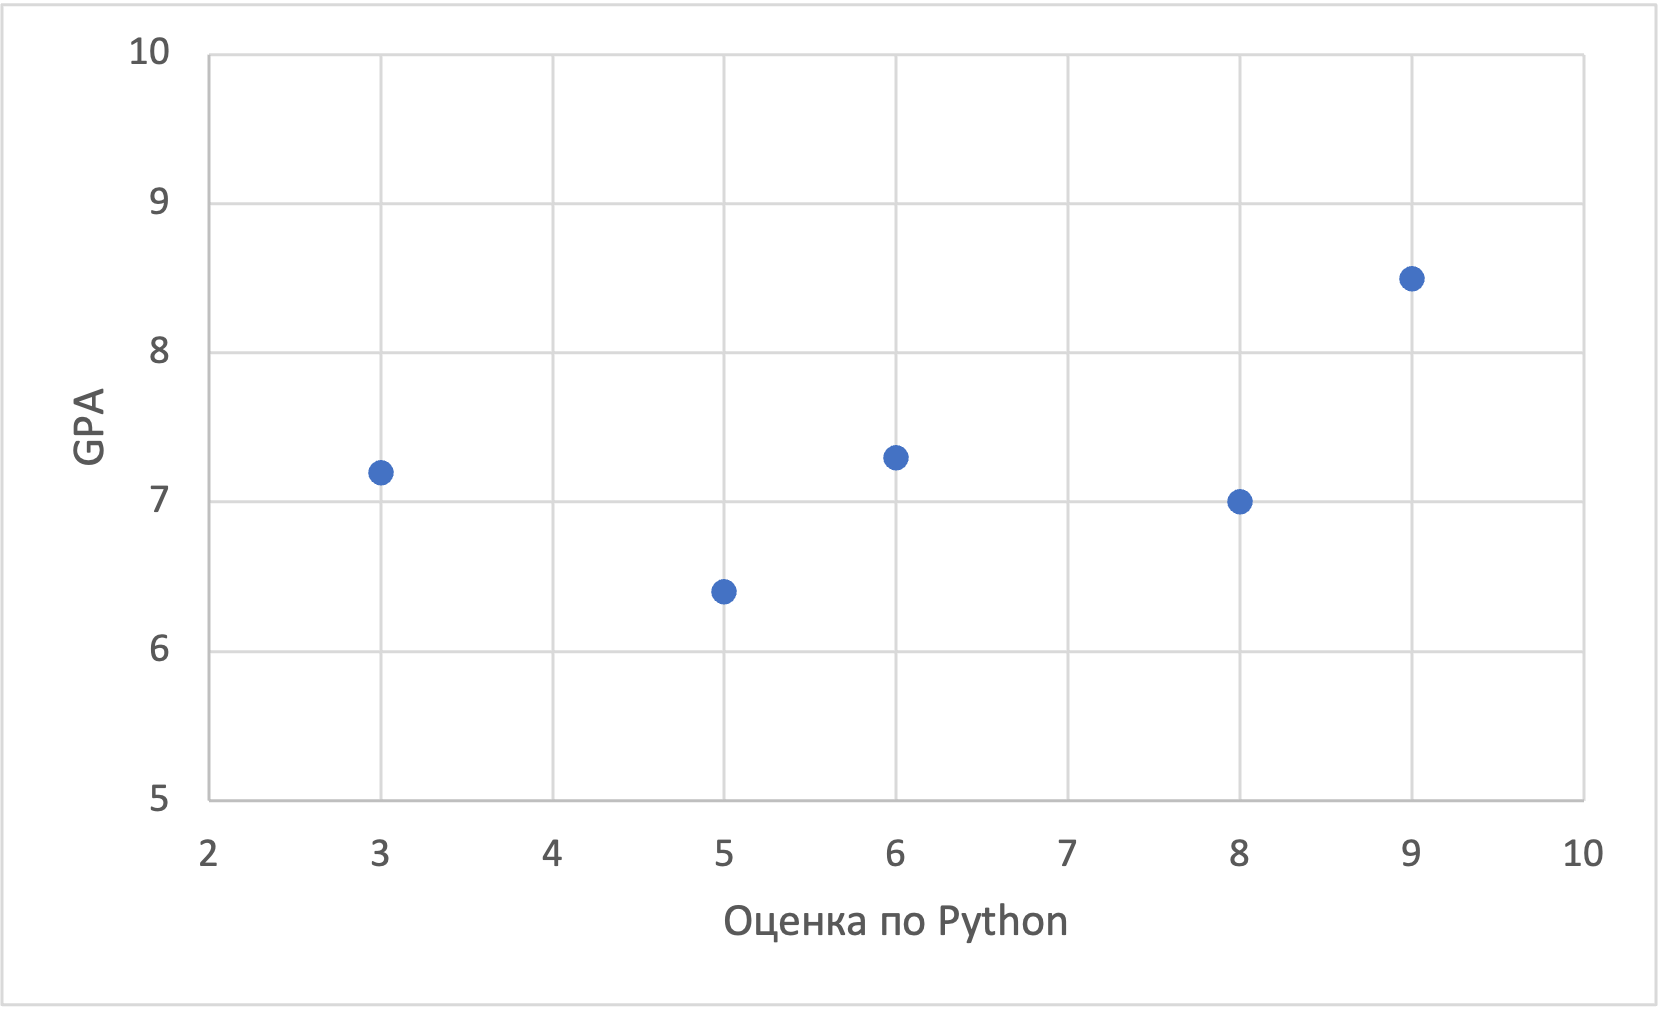

In [124]:
marks['Python'].corr(marks['GPA'])

0.5767611261991067

#### By Python

In [44]:
df.Age.corr(df.Fare)

0.0960666917690389

In [45]:
df.Fare.corr(df.Age)

0.09606669176903888

Direct very weak correlation between age and ticket price (nearly zero)

In [46]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_fillna,Age_fillna_mg,Age_random
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.034212,0.035840,0.019194
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.064910,-0.047255,-0.069969
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.339898,-0.408487,-0.315542
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.233296,-0.243526,-0.237667
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.172482,-0.171095,-0.157200
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096688,0.123784,0.080378
Age_fillna,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,1.000000,0.985358,0.915887
Age_fillna_mg,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.985358,1.000000,0.904332
Age_random,0.019194,-0.069969,-0.315542,1.000000,-0.237667,-0.157200,0.080378,0.915887,0.904332,1.000000


In [125]:
import seaborn as sns

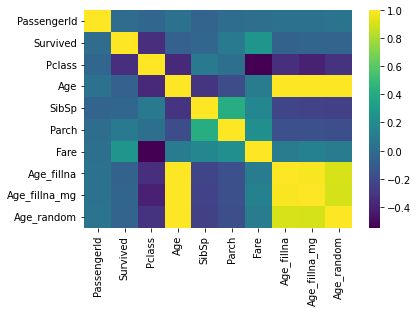

In [128]:
sns.heatmap(df.corr(), cmap='viridis');

To visually determine the correlation, a **scatterplot** is built:

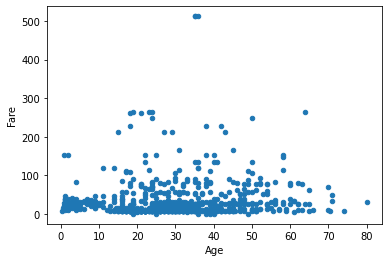

In [131]:
df.plot('Age', 'Fare', kind = 'scatter');

### Correlation matrix

In [48]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_fillna,Age_fillna_mg,Age_random
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.034212,0.035840,0.019194
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.064910,-0.047255,-0.069969
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.339898,-0.408487,-0.315542
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,1.000000,1.000000,1.000000
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.233296,-0.243526,-0.237667
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.172482,-0.171095,-0.157200
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.096688,0.123784,0.080378
Age_fillna,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,1.000000,0.985358,0.915887
Age_fillna_mg,0.035840,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.985358,1.000000,0.904332
Age_random,0.019194,-0.069969,-0.315542,1.000000,-0.237667,-0.157200,0.080378,0.915887,0.904332,1.000000


## Practice

Analyzing a dataset with information about athletes participating in the Olympic Games

The data contains the following characteristics:

**ID** - Unique number for each athlete

**Name** - Athlete's name

**Sex** - M or F

**Age** - Integer

**Height** - In centimeters

**Weight** - In kilograms

**Team** - Team name

**NOC** - National Olympic Committee 3-letter code

**Games** - Year and season

**Year** - Integer

**Season** - Summer or Winter

**City** - Host city

**Sport** - Sport

**Event** - Event

**Medal** - Gold, Silver, Bronze, or NA

In [49]:
import pandas as pd
import numpy as np
odf = pd.read_csv('athlete_events.csv')
odf

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Task 1

1. Detect which variables have missing data

2. Choose one continuous numeric variable that has NaNs. Replace the gaps with an appropriate measure of central tendency by group(s).

-  Determine which measure of central tendency is best for replacement

- Calculate this measure of central tendency and interpret it

*your interpretation here*

-  Make an assumption about what factors will affect the value of the variable in which we replace NaNs and check it using grouping

-  Using the `.transform()` method, we substitute for each athlete the selected measure of the central tendency for the selected grouping

-  Let's replace NaNs in the data with a measure of the central tendency depending on the group using `.fillna()`. Write the result in a new column which you name **Name_without_na**

- Check that **ALL** gaps have been replaced

-  If there are gaps in your new column, delete all rows that have gaps and store the resulting dataframe in a new variable

### Task 2

1. How many sports disciplines were in each Summer Olympiad of the 20th century

In [132]:
#1.filter Season, Year
#2. groupby Games
# 3. .nunique()

2. Visualize your output

3. Save the data about the Olympiad in which there were the most sports disciplines in a new variable

*Next, you work with the data of this Olympiad only*

4. Group the data by sport and find for each sport the average of all continuous numerical features

5. Build a graph based on the grouped data that shows the relationship between two variables (there should be three such graphs)

*here write your assumptions about what level of correlation between features*

*here write your assumptions about what level of correlation between features*

*here write your assumptions about what level of correlation between features*

6. Build a correlation matrix from the resulting grouping

7. Write an interpretation to all correlation coefficients of the resulting matrix

*your interpretation here*

*your interpretation here*

*your interpretation here*